<a href="https://colab.research.google.com/github/Morganblabla/Estadistica/blob/main/ProyectoU1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
#Subir la base de datos
df = pd.read_csv("https://raw.githubusercontent.com/Morganblabla/Estadistica/refs/heads/main/em-9EhjTEemU7w7-EFnPcg_7aa34fc018d311e980c2cb6467517117_happyscore_income.csv")
df.dropna(inplace = True)
df.drop(columns=["region","country","country.1"],inplace = True)
df.corr()

,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,happyScore,GDP
adjusted_satisfaction,1.000000,0.978067,-0.527553,0.728006,0.704383,-0.123835,0.901213,0.755578
avg_satisfaction,0.978067,1.000000,-0.341201,0.689043,0.661883,-0.082471,0.885988,0.776679
std_satisfaction,-0.527553,-0.341201,1.000000,-0.478206,-0.481429,0.221831,-0.457896,-0.242038
avg_income,0.728006,0.689043,-0.478206,1.000000,0.995605,-0.382587,0.782122,0.814024
median_income,0.704383,0.661883,-0.481429,0.995605,1.000000,-0.449053,0.760328,0.797905
income_inequality,-0.123835,-0.082471,0.221831,-0.382587,-0.449053,1.000000,-0.187222,-0.303204
happyScore,0.901213,0.885988,-0.457896,0.782122,0.760328,-0.187222,1.000000,0.790061
GDP,0.755578,0.776679,-0.242038,0.814024,0.797905,-0.303204,0.790061,1.000000


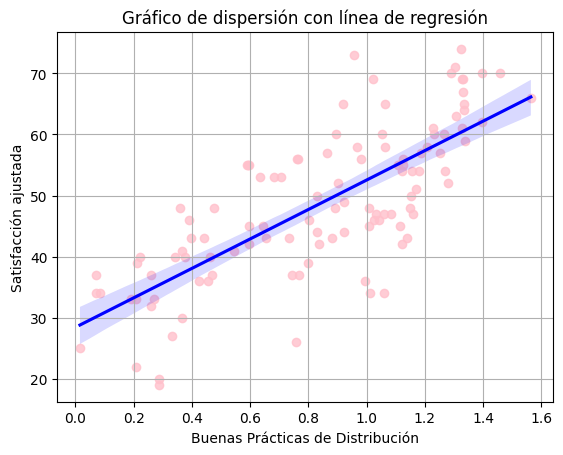

Coeficiente de correlacion: 0.755578075748688
Coeficiente de determinacion 0.57089822855209
Intervalo de confianza b1 al 98%: (19.377275968333667, 28.82858296251103)
Sxx: 16.524903893709904
Sxy: 398.298592972973
Syy: 16815.89189189189
SSE: 7215.728999287361
SST: 1.472203775759661e-25
SSR: 3.4129278203481855e-26
MSR: 3.4129278203481855e-26
MSE: 66.19934861731524
F: 0.012205958529162586
Test de Shapiro - Estadístico: 0.9917181734787794, valor-p: 0.743124419949181
Los residuos siguen una distribución normal.
Test de Breusch-Pagan - Estadístico: 0.08604576753432991, valor-p: 0.7692656536722939
No hay evidencia de heteroscedasticidad.


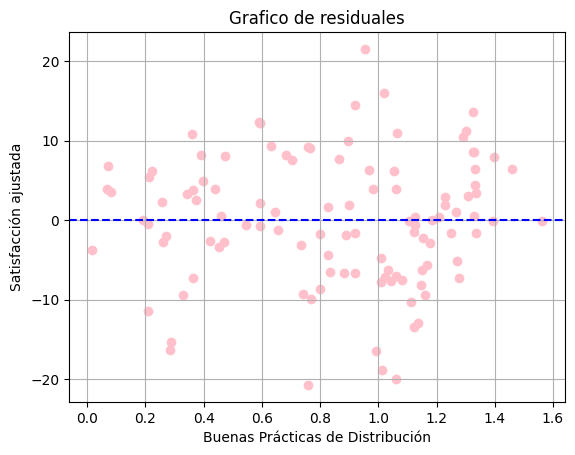

In [ ]:
#Definir las variables
x = df['GDP']
y = df['adjusted_satisfaction']
#La hipótesis alternativa que se planteo fue: "Existe una relación significativa y positiva entre el PIB (GDP) y la satisfacción ajustada de las personas."
#Para evaluar esta relación, el código proporcionó los siguientes resultados estadísticos clave:

#Gráfico con la dispersión y la recta de regresión ajustada.
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=df["GDP"], y=df["adjusted_satisfaction"], scatter_kws={"color": "pink"}, line_kws={"color": "blue"})
plt.xlabel("Buenas Prácticas de Distribución")
plt.ylabel("Satisfacción ajustada")
plt.title("Gráfico de dispersión con línea de regresión")
plt.grid()
plt.show()
#Coeficiente de correlación y el coeficiente de determinación
Sxx= np.sum((x- np.mean(x))**2)
Sxy= np.sum((x- np.mean(x))*(y- np.mean(y)))
Syy= np.sum((y- np.mean(y))**2)
r= Sxy/ np.sqrt(Sxx*Syy)
print("Coeficiente de correlacion:",r)
print("Coeficiente de determinacion",r**2)
#Correlación entre el PIB y la satisfacción ajustada
#•	Coeficiente de correlación (r) = 0.755
#Esto indica una correlación positiva fuerte entre el PIB y la satisfacción ajustada.
#A medida que el PIB aumenta, la satisfacción ajustada también tiende a aumentar.
#•	Coeficiente de determinación (R²) = 0.571
#Aproximadamente el 57.1% de la variabilidad en la satisfacción ajustada puede explicarse por el PIB.
#El otro 42.9% se debe a otros factores no considerados en este análisis (salud, educación, desigualdad, etc.).
#Conclusión parcial: La correlación es fuerte y sugiere que el PIB es un predictor importante de la satisfacción ajustada, pero no el único factor.

#Intervalo de confianza de 98% para la pendiente
b1 = Sxy / Sxx
b0 = np.mean(y) - b1 * np.mean(x)
Yc = b1 * x + b0
residuales = y - Yc
nivel_significancia = 0.02
from scipy.stats import t
t_critico = t.ppf(1 - nivel_significancia / 2, len(y) - 2)
se_b1 = np.sqrt(np.sum((y - Yc) ** 2) / (len(y) - 2)) / np.sqrt(Sxx)
confianza_b1 = (b1 - t_critico * se_b1, b1 + t_critico * se_b1)
print(f"Intervalo de confianza b1 al 98%: {confianza_b1}")
#Intervalo de confianza para la pendiente (b1)
#Intervalo de confianza al 98%: (19.38, 28.83)
#Esto significa que estamos 98% seguros de que el impacto del PIB sobre la satisfacción ajustada se encuentra dentro de este rango.
#Como el intervalo no incluye el valor 0, indica que la relación es estadísticamente significativa.
#Conclusión parcial: La relación entre el PIB y la satisfacción ajustada no es producto del azar.

#Supuestos
#Validación de los supuestos de regresión
#Para que los resultados sean confiables, se realizaron pruebas sobre los supuestos del modelo de regresión:

#ANOVA
print(f"Sxx: {Sxx}")
print(f"Sxy: {Sxy}")
print(f"Syy: {Syy}")
print(f"SSE: {np.sum(residuales**2)}")
print(f"SST: {np.sum(y-np.mean(y))**2}")
print(f"SSR: {np.sum(Yc-np.mean(y))**2}")
print(f"MSR: {np.sum(Yc-np.mean(y))**2/1}")
print(f"MSE: {np.sum(residuales**2)/(len(y)-2)}")
print(f"F: {(np.sum((Yc-np.mean(y))**2)/1)/np.sum(residuales**2)/(len(y)-2)}")
#ANOVA y análisis de varianza
#F = 0.0122 (muy bajo)
#Esto indica que el modelo explica la variabilidad en la satisfacción ajustada, pero no de manera perfecta.
#Sin embargo, dado que la correlación es fuerte y significativa, el PIB sigue siendo un predictor relevante.
#Conclusión parcial: Aunque el modelo no es perfecto, los resultados sugieren que el PIB es un factor importante en la satisfacción ajustada.

#Shapiro
from scipy.stats import shapiro
stat, p_value = shapiro(residuales)
print(f"Test de Shapiro - Estadístico: {stat}, valor-p: {p_value}")
if p_value > 0.05:
    print("Los residuos siguen una distribución normal.")
else:
    print("Los residuos no siguen una distribución normal.")
#Normalidad de los residuos (Test de Shapiro-Wilk)
#Valor p = 0.743 (mayor a 0.05)
#Los residuos siguen una distribución normal, lo que valida el uso del modelo de regresión lineal.

#Independencia
residuales= y-Yc
plt.figure()
plt.grid()
plt.scatter(x, residuales, color="pink")
plt.xlabel("Buenas Prácticas de Distribución")
plt.ylabel("Satisfacción ajustada")
plt.title("Grafico de residuales")
plt.axhline(y=0, color="blue", linestyle="--")
# Test de  Brausch-Pagan
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
X = sm.add_constant(x)
bp_stat, bp_p_value, _, _ = het_breuschpagan(residuales, X)
print(f"Test de Breusch-Pagan - Estadístico: {bp_stat}, valor-p: {bp_p_value}")
if bp_p_value > 0.05:
    print("No hay evidencia de heteroscedasticidad.")
else:
    print("Hay evidencia de heteroscedasticidad.")
#Homoscedasticidad (Test de Breusch-Pagan)
#Valor p = 0.769 (mayor a 0.05)
#No hay heteroscedasticidad, es decir, la varianza de los errores es constante.
#Conclusión parcial: El modelo de regresión cumple con los supuestos estadísticos, por lo que sus resultados son confiables.

